## Baseball Case Study
Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.
Input features:

Runs, At Bats, Hits, Doubles, Triples, Home Runs, Base on Balls, Strike Outs, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors
Output:

Number of predicted wins (W)


### Importing the required libraries:

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings('ignore')

In [81]:
df=pd.read_csv('baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [82]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [83]:
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [84]:
df.shape

(30, 17)

In [85]:
df=df.rename(columns={'W':'Wins', 'R':'Runs', 'AB':'At Bats', 'H':'Hits', '2B':'Doubles', '3B':'Triples', 'HR':'Home Runs', 
                   'BB':'Base on Balls', 'SO':'Strike Outs', 'SB':'Stolen Bases', 'RA':'Runs Allowed', 'ER':'Earned Runs', 
                   'ERA':'Earned Run Average', 'CG':'Complete Games', 'SHO':'Shutouts', 'SV':'Saves', 'E':'Errors'})
df

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [86]:
df.isnull().sum()

Wins                  0
Runs                  0
At Bats               0
Hits                  0
Doubles               0
Triples               0
Home Runs             0
Base on Balls         0
Strike Outs           0
Stolen Bases          0
Runs Allowed          0
Earned Runs           0
Earned Run Average    0
Complete Games        0
Shutouts              0
Saves                 0
Errors                0
dtype: int64

In [8]:
df.dtypes

Wins                    int64
Runs                    int64
At Bats                 int64
Hits                    int64
Doubles                 int64
Triples                 int64
Home Runs               int64
Base on Balls           int64
Strike Outs             int64
Stolen Bases            int64
Runs Allowed            int64
Earned Runs             int64
Earned Run Average    float64
Complete Games          int64
Shutouts                int64
Saves                   int64
Errors                  int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Wins                30 non-null     int64  
 1   Runs                30 non-null     int64  
 2   At Bats             30 non-null     int64  
 3   Hits                30 non-null     int64  
 4   Doubles             30 non-null     int64  
 5   Triples             30 non-null     int64  
 6   Home Runs           30 non-null     int64  
 7   Base on Balls       30 non-null     int64  
 8   Strike Outs         30 non-null     int64  
 9   Stolen Bases        30 non-null     int64  
 10  Runs Allowed        30 non-null     int64  
 11  Earned Runs         30 non-null     int64  
 12  Earned Run Average  30 non-null     float64
 13  Complete Games      30 non-null     int64  
 14  Shutouts            30 non-null     int64  
 15  Saves               30 non-null     int64  
 16  Errors    

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [12]:
df.groupby('Runs')['Wins'].mean()

Runs
573     67.0
613     71.0
622     76.0
626     63.0
640     64.0
644     80.0
647    100.0
650     74.0
655     68.0
656     76.0
661     85.0
667     92.0
669     81.0
683     90.0
689     85.5
694     68.0
696     83.5
697     98.0
703     83.0
713     81.0
720     79.0
724     95.0
729     86.0
737     68.0
748     78.0
751     88.0
764     87.0
891     93.0
Name: Wins, dtype: float64

<AxesSubplot:>

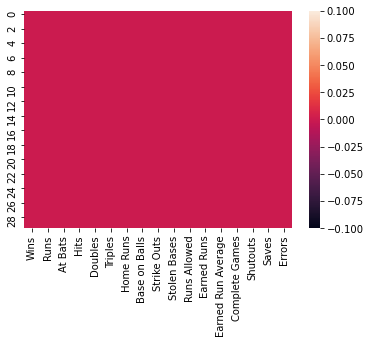

In [13]:
sns.heatmap(df.isnull())

In [14]:
#lets check correlation
df_cor=df.corr()
df_cor

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
Runs,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
At Bats,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
Hits,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
Doubles,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
Triples,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
Home Runs,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
Base on Balls,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
Strike Outs,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
Stolen Bases,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


<AxesSubplot:>

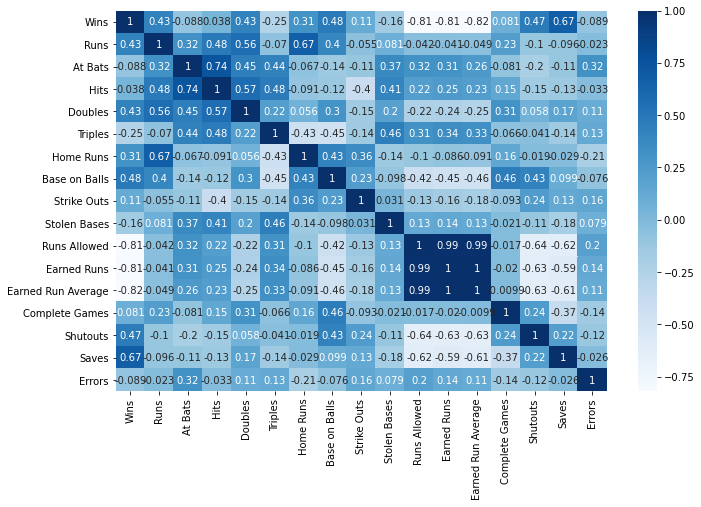

In [15]:
#using heatmap see the correlation of variables
plt.figure(figsize=(11,7))
sns.heatmap(df_cor,cmap='Blues',annot=True)

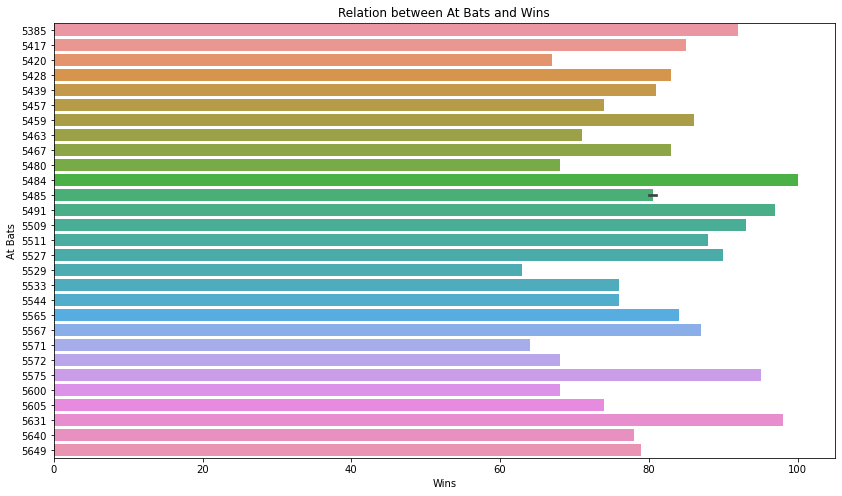

In [16]:
# Plotting graph to see the relation between 'At Bats' and 'Wins'
plt.figure(figsize=[14,8])
sns.barplot(x='Wins', y='At Bats', data=df, orient='h')
plt.title('Relation between At Bats and Wins')
plt.show()

<AxesSubplot:xlabel='Complete Games', ylabel='Shutouts'>

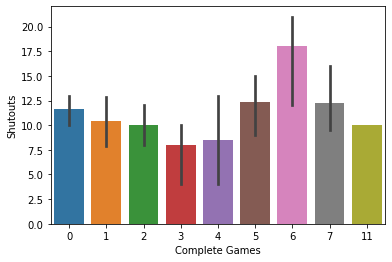

In [17]:
sns.barplot(x='Complete Games',y='Shutouts',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Home Runs'>

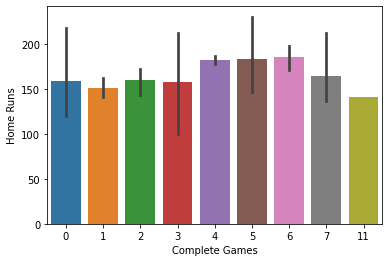

In [18]:
sns.barplot(x='Complete Games',y='Home Runs',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Saves'>

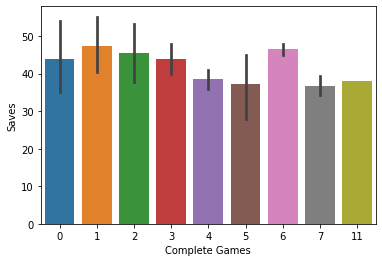

In [19]:
sns.barplot(x='Complete Games',y='Saves',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Errors'>

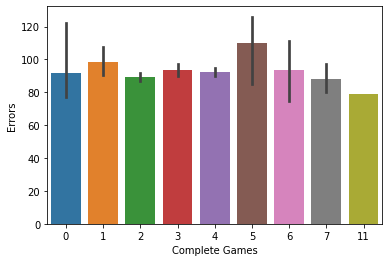

In [20]:
sns.barplot(x='Complete Games',y='Errors',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Hits'>

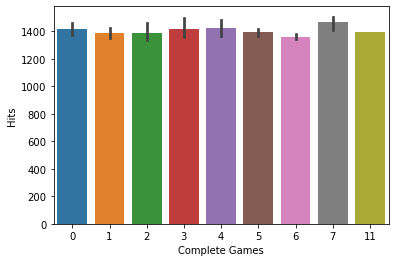

In [21]:
sns.barplot(x='Complete Games',y='Hits',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='At Bats'>

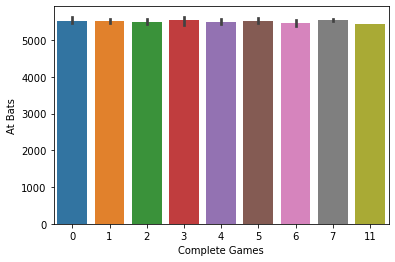

In [22]:
sns.barplot(x='Complete Games',y='At Bats',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Wins'>

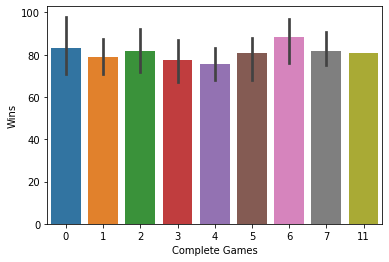

In [23]:
sns.barplot(x='Complete Games',y='Wins',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Base on Balls'>

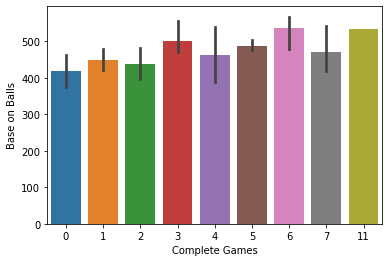

In [24]:
sns.barplot(x='Complete Games',y='Base on Balls',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Runs'>

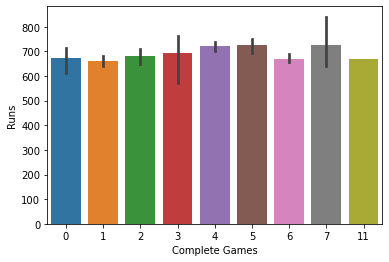

In [25]:
sns.barplot(x='Complete Games',y='Runs',data=df)

<AxesSubplot:xlabel='Complete Games', ylabel='Strike Outs'>

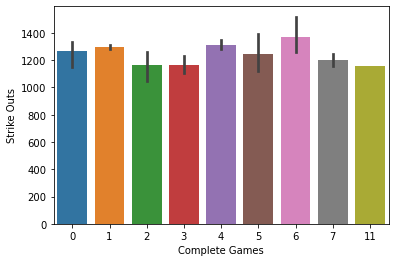

In [26]:
sns.barplot(x='Complete Games',y='Strike Outs',data=df)

<AxesSubplot:xlabel='Wins', ylabel='Saves'>

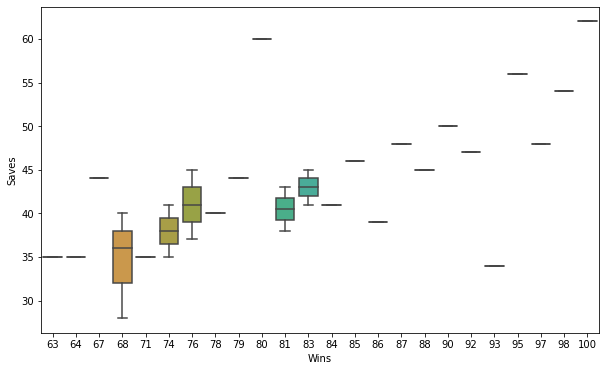

In [27]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Wins',y='Saves',data=df)

<AxesSubplot:xlabel='Wins', ylabel='Errors'>

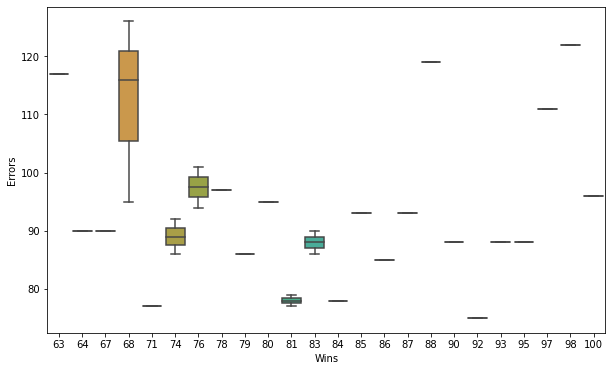

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Wins',y='Errors',data=df)

<AxesSubplot:xlabel='Doubles', ylabel='Runs'>

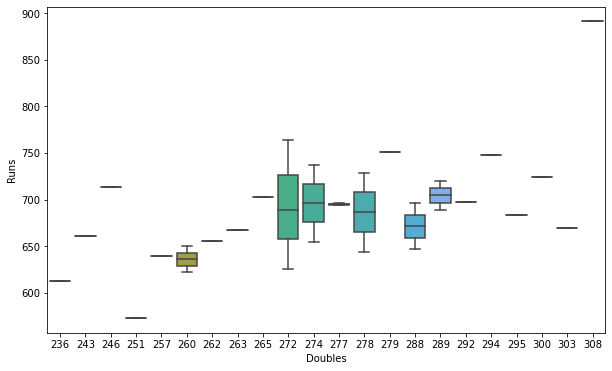

In [29]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Doubles',y='Runs',data=df)

<AxesSubplot:xlabel='Wins', ylabel='Saves'>

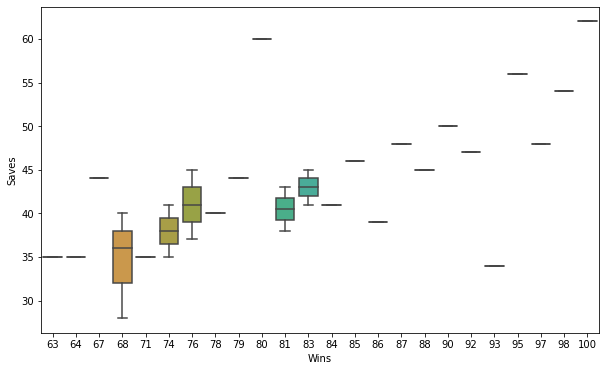

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Wins',y='Saves',data=df)

<Figure size 720x360 with 0 Axes>

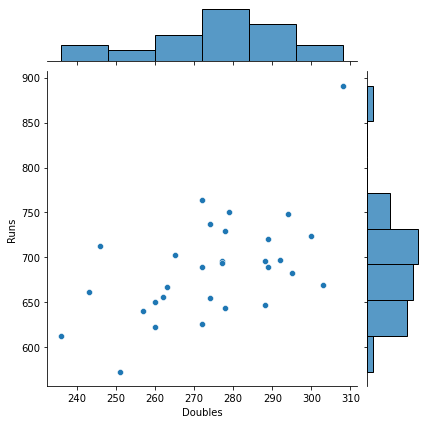

In [31]:
plt.figure(figsize=(10,5))
sns.jointplot(x='Doubles',y='Runs',data=df,kind='scatter')

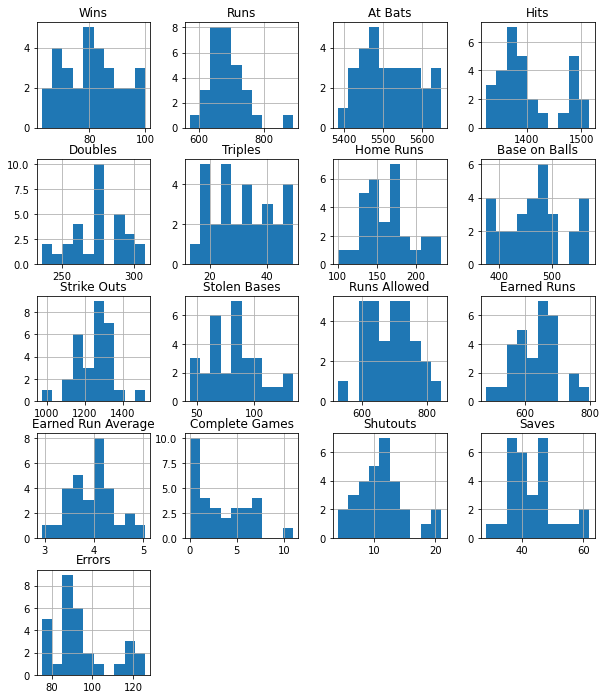

In [32]:
df.hist(figsize=(10,12))
plt.show()

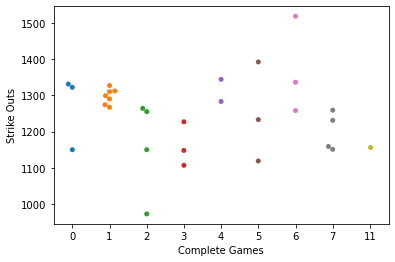

In [33]:
sns.swarmplot(y='Strike Outs',x='Complete Games',data=df)
plt.show()

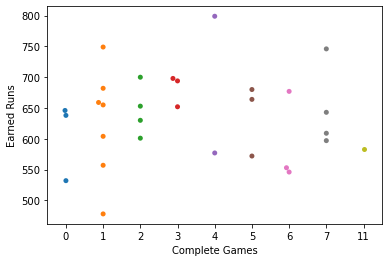

In [34]:
sns.swarmplot(y='Earned Runs',x='Complete Games',data=df)
plt.show()

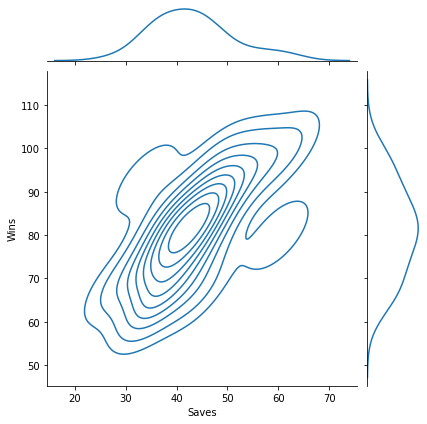

In [35]:
sns.jointplot(x='Saves',y='Wins',data=df,kind='kde')

<AxesSubplot:xlabel='Strike Outs', ylabel='Wins'>

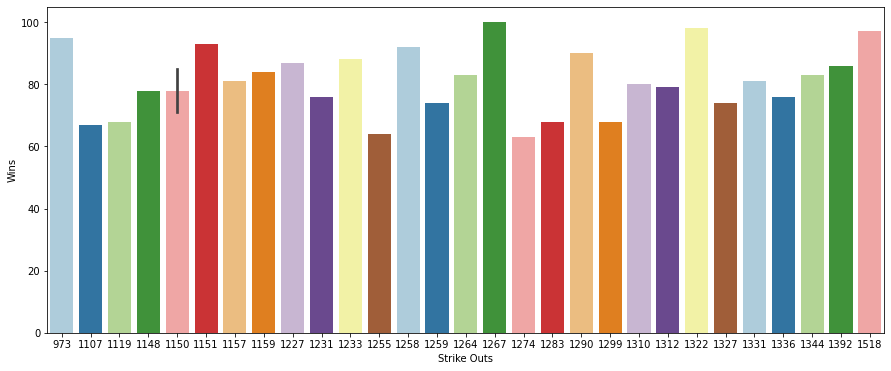

In [36]:
plt.figure(figsize=(15,6))
sns.barplot(x='Strike Outs',y='Wins',data=df,palette="Paired")

## Checking Outliers

In [37]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls', 'Strike Outs', 'Stolen Bases', 'Runs Allowed',
       'Earned Runs', 'Earned Run Average', 'Complete Games', 'Shutouts',
       'Saves', 'Errors'],
      dtype='object')

<AxesSubplot:>

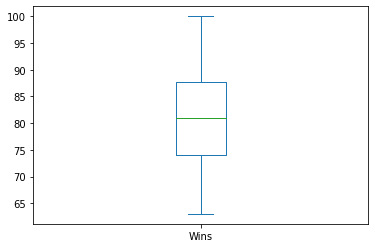

In [38]:
df['Wins'].plot.box()

<AxesSubplot:>

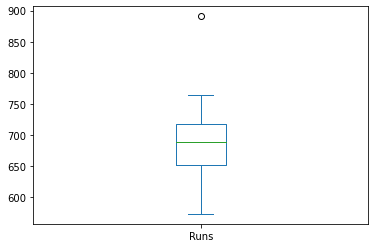

In [39]:
df['Runs'].plot.box()

<AxesSubplot:>

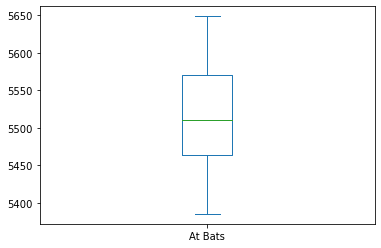

In [40]:
df['At Bats'].plot.box()

<AxesSubplot:>

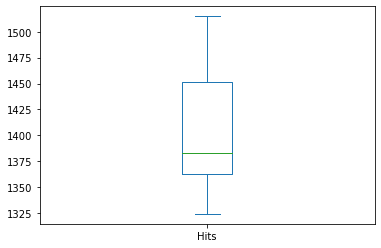

In [41]:
df['Hits'].plot.box()

<AxesSubplot:>

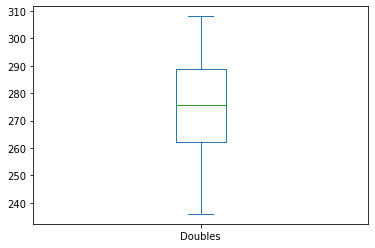

In [42]:
df['Doubles'].plot.box()

<AxesSubplot:>

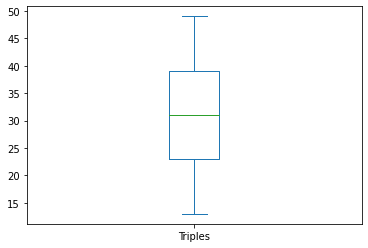

In [43]:
df['Triples'].plot.box()

<AxesSubplot:>

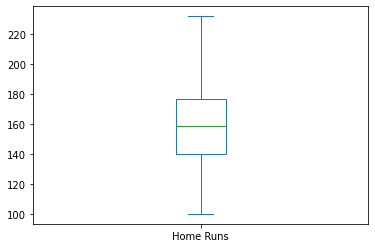

In [44]:
df['Home Runs'].plot.box()

<AxesSubplot:>

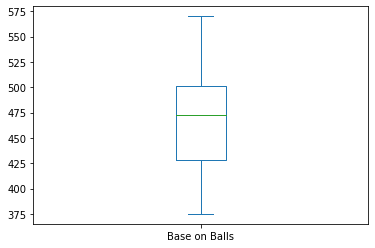

In [45]:
df['Base on Balls'].plot.box()

<AxesSubplot:>

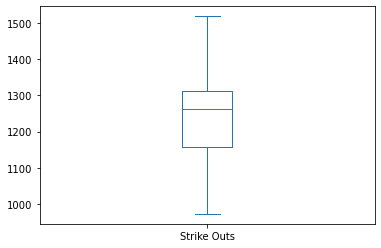

In [46]:
df['Strike Outs'].plot.box()

<AxesSubplot:>

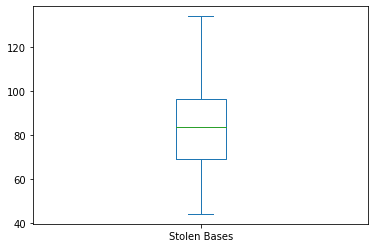

In [47]:
df['Stolen Bases'].plot.box()

<AxesSubplot:>

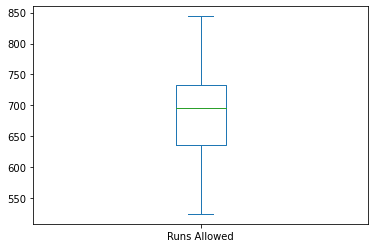

In [48]:
df['Runs Allowed'].plot.box()

<AxesSubplot:>

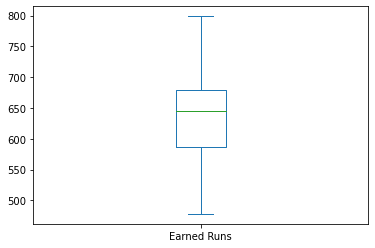

In [49]:
df['Earned Runs'].plot.box()

<AxesSubplot:>

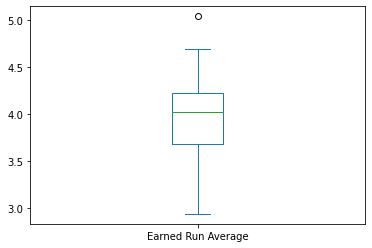

In [50]:
df['Earned Run Average'].plot.box()

<AxesSubplot:>

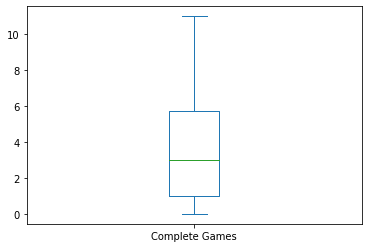

In [51]:
df['Complete Games'].plot.box()

In [52]:
#TO CHECK OUTLIERS OF ALL AT A TIME
columnlist=df.columns.values
numcol=30
numrows=17

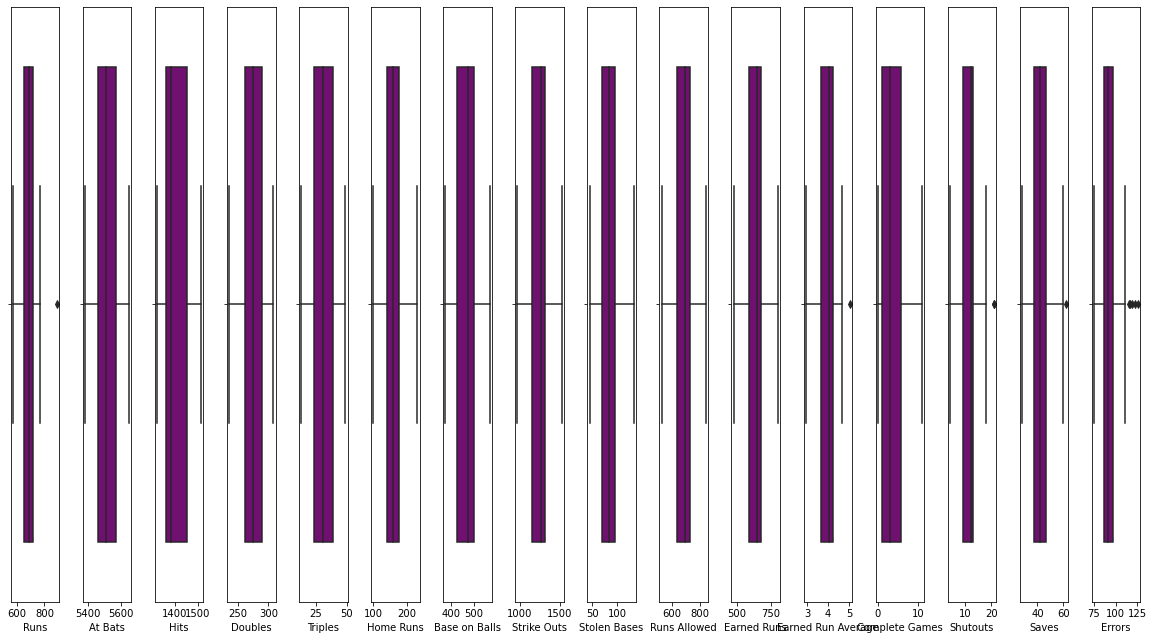

In [53]:
plt.figure(figsize=(numcol,5*numcol))
for i in range(1, len(columnlist)):
    plt.subplot(numrows,numcol,i+1)
    sns.boxplot(df[columnlist[i]],color='purple',orient='v')
    plt.tight_layout()

## Checking Skewness

In [54]:
df.skew()

Wins                  0.047089
Runs                  1.200786
At Bats               0.183437
Hits                  0.670254
Doubles              -0.230650
Triples               0.129502
Home Runs             0.516441
Base on Balls         0.158498
Strike Outs          -0.156065
Stolen Bases          0.479893
Runs Allowed          0.045734
Earned Runs           0.058710
Earned Run Average    0.053331
Complete Games        0.736845
Shutouts              0.565790
Saves                 0.657524
Errors                0.890132
dtype: float64

<AxesSubplot:xlabel='Wins', ylabel='Density'>

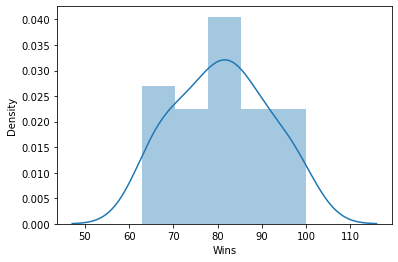

In [55]:
sns.distplot(df['Wins'])

<AxesSubplot:xlabel='Runs', ylabel='Density'>

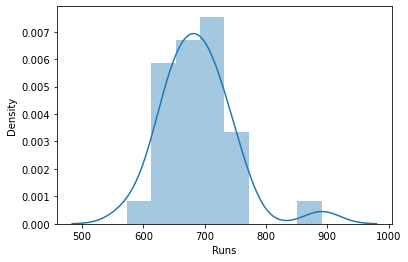

In [56]:
sns.distplot(df['Runs'])

<AxesSubplot:xlabel='At Bats', ylabel='Density'>

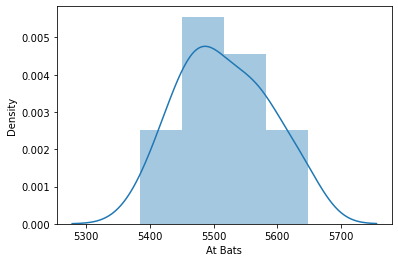

In [57]:
sns.distplot(df['At Bats'])

<AxesSubplot:xlabel='Hits', ylabel='Density'>

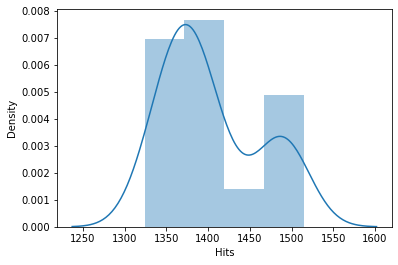

In [58]:
sns.distplot(df['Hits'])

<AxesSubplot:xlabel='Doubles', ylabel='Density'>

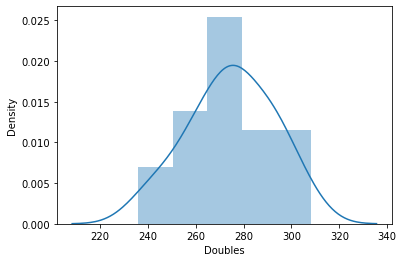

In [59]:
sns.distplot(df['Doubles'])

<AxesSubplot:xlabel='Triples', ylabel='Density'>

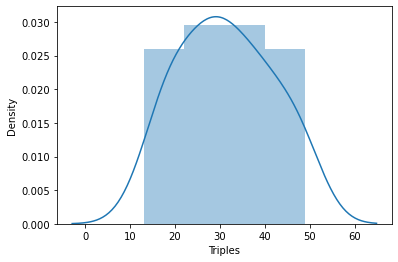

In [60]:
sns.distplot(df['Triples'])

<AxesSubplot:xlabel='Home Runs', ylabel='Density'>

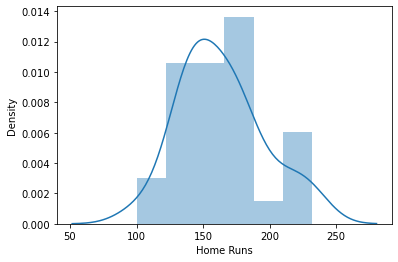

In [61]:
sns.distplot(df['Home Runs'])

<AxesSubplot:xlabel='Base on Balls', ylabel='Density'>

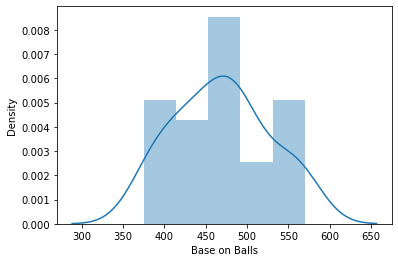

In [62]:
sns.distplot(df['Base on Balls'])

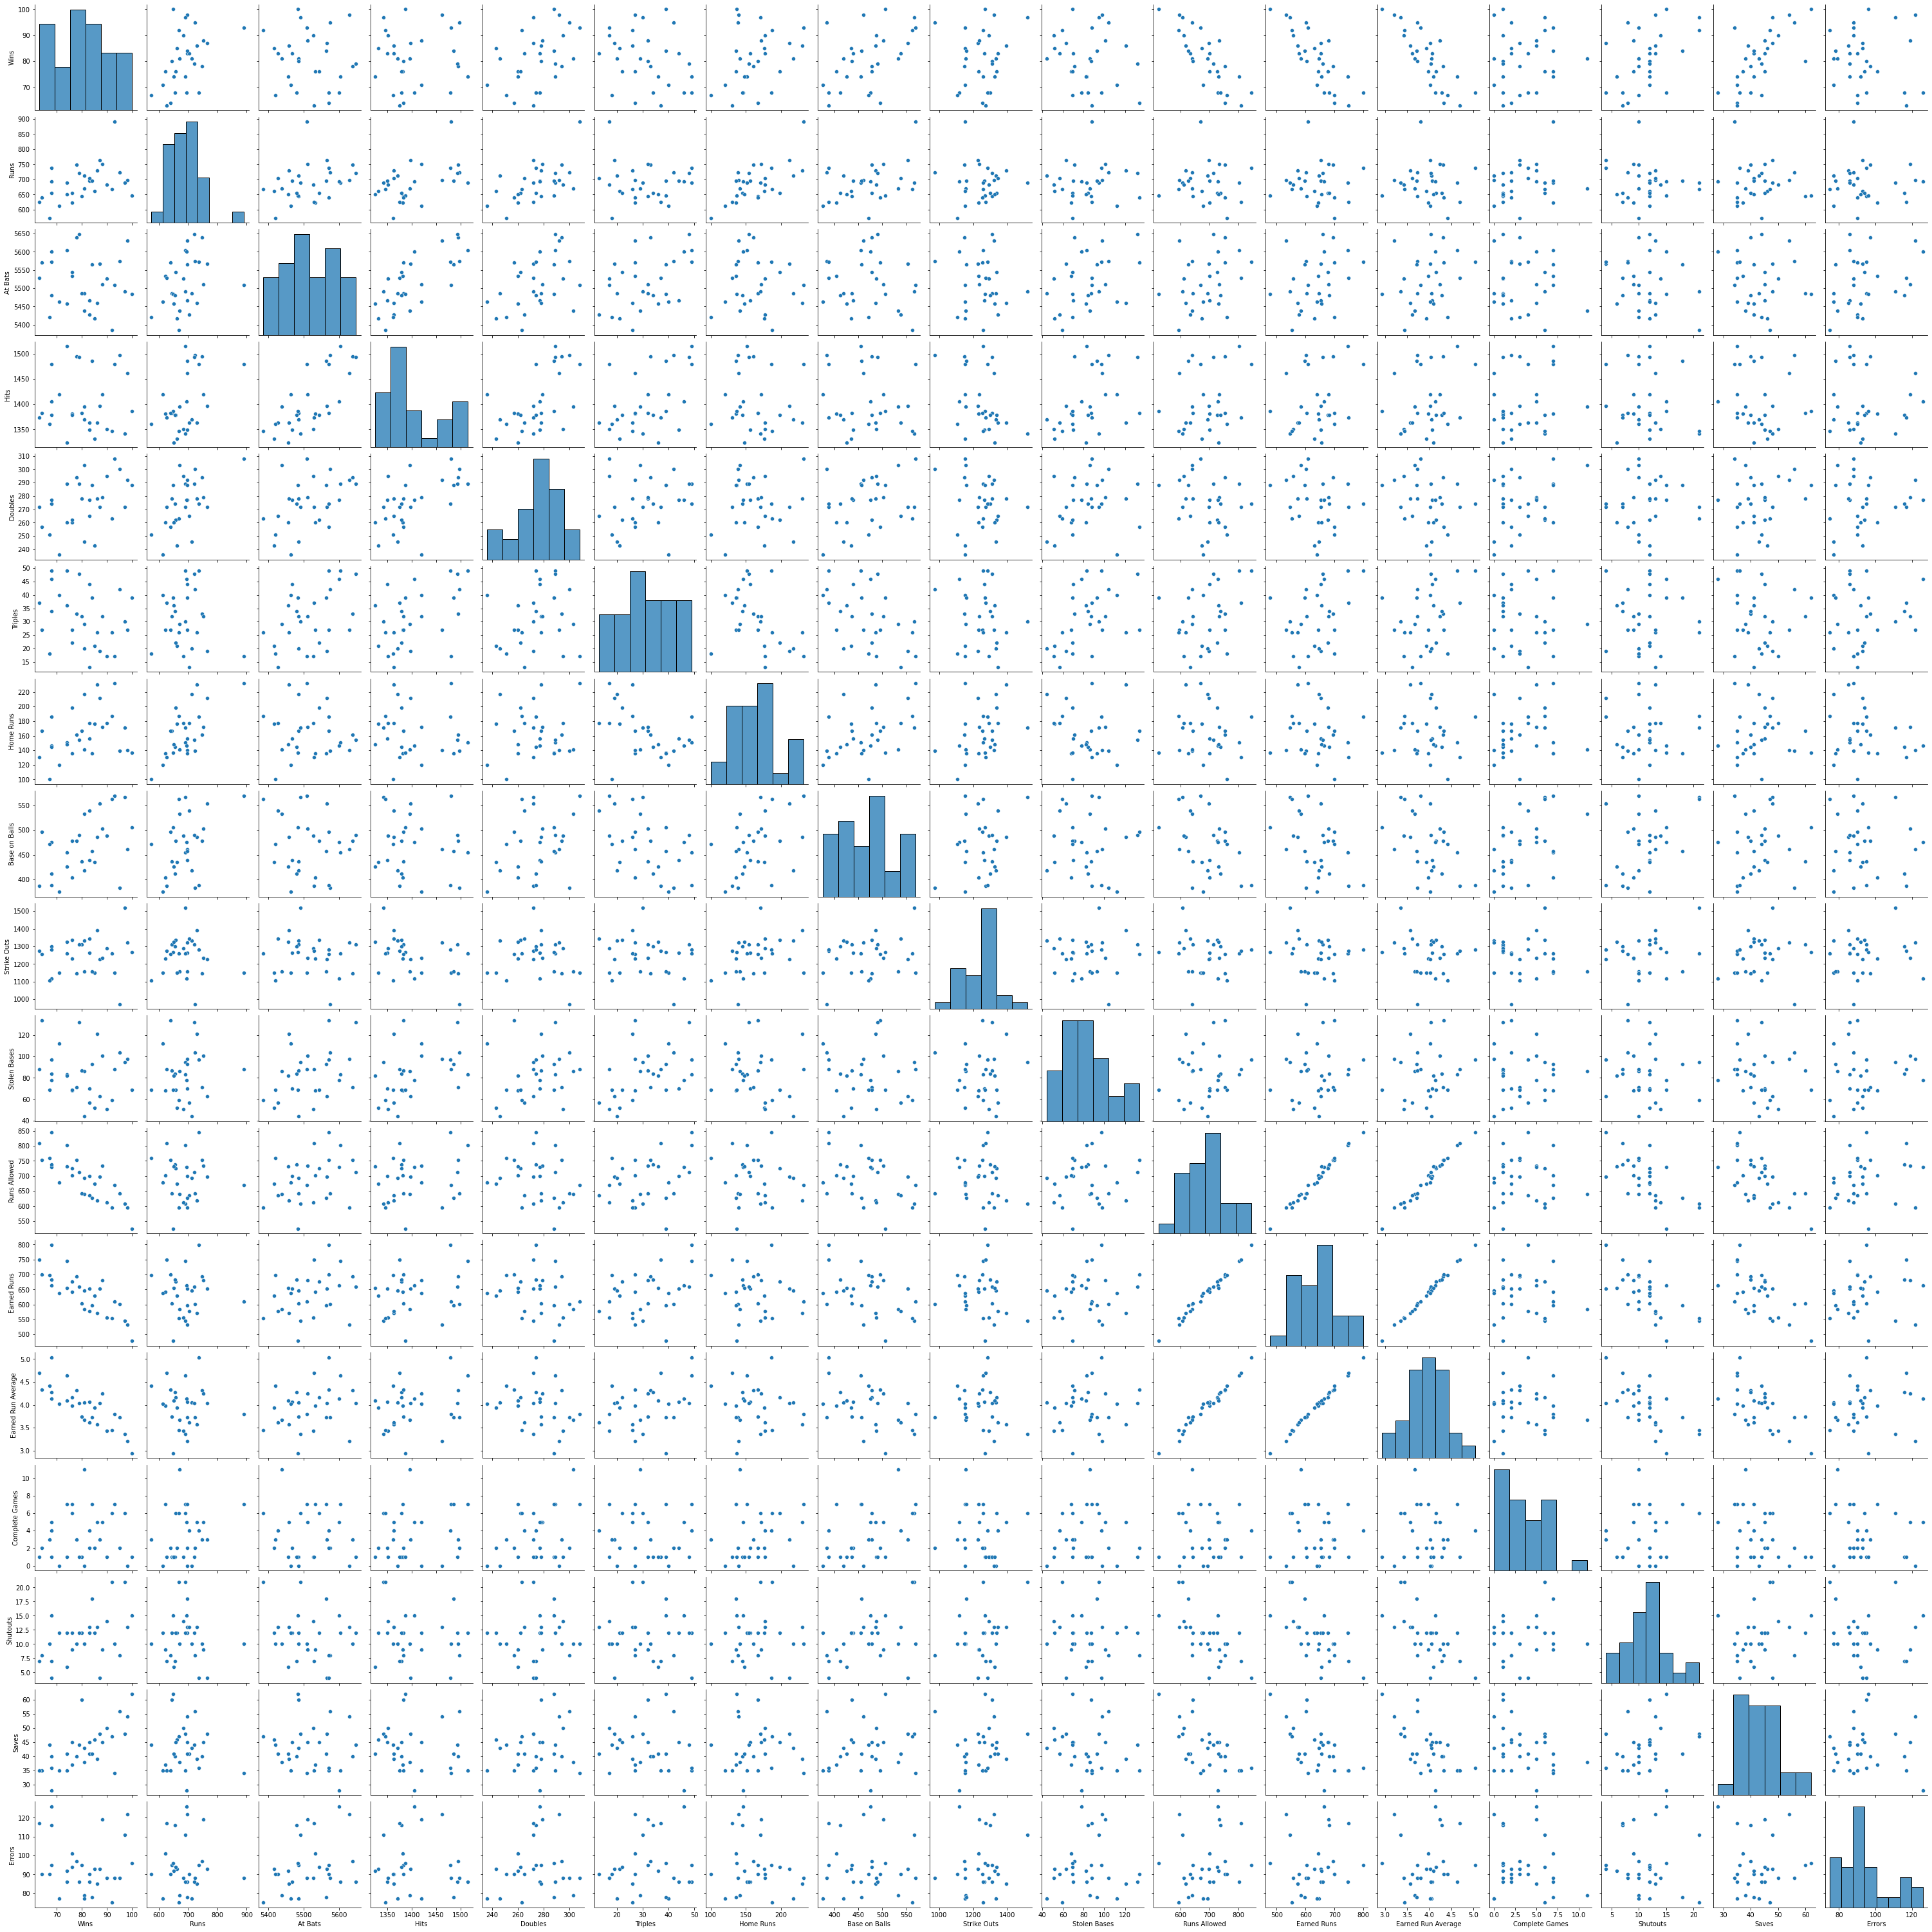

In [63]:
## To check skewness of all the columns at a time

sns.pairplot(df)

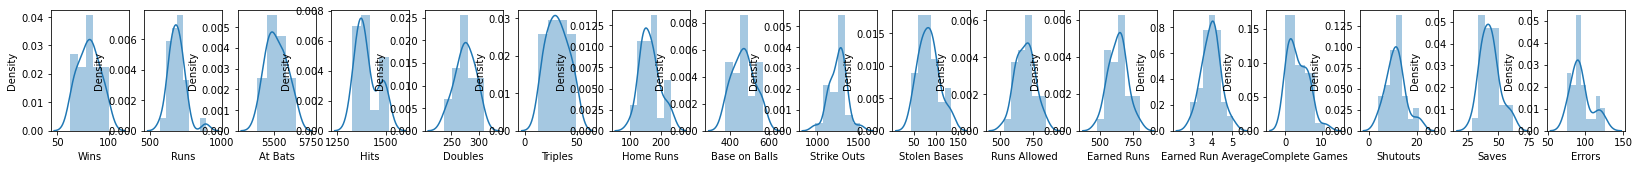

In [64]:
plt.figure(figsize=(50,45))
for i in range(0,len(columnlist)):
    plt.subplot(numrows,numcol,i+1)
    sns.distplot(df[columnlist[i]])

In [127]:
## Removing Skewness

from sklearn.preprocessing import power_transform

x = power_transform(x)
x

array([[ 9.62569268e-01,  0.00000000e+00,  0.00000000e+00,
         1.70501701e+00,  1.00821401e+00, -7.38549418e-01,
        -1.59342078e+00, -2.52265498e+00,  9.35987706e-01,
        -6.63484666e-01, -5.14012705e-01, -5.15054785e-01,
        -3.18537586e-01, -7.88486538e-01,  1.52534194e+00,
        -3.31781664e-01],
       [ 2.97395258e-01,  0.00000000e+00,  0.00000000e+00,
         1.27251302e-01,  1.19389204e+00, -1.00567628e-01,
        -4.68097231e-01,  8.78305820e-02, -5.19237207e-01,
         1.55288423e-01,  2.27703331e-01,  2.33598678e-01,
        -3.18537586e-01,  2.31783673e-01,  3.16899471e-01,
        -5.28394725e-01],
       [-3.13561320e-01,  0.00000000e+00,  0.00000000e+00,
         1.93455938e+00, -2.45242549e-01, -6.59841866e-01,
         1.23669865e+00, -9.35493526e-01,  2.21102515e-01,
        -6.77371069e-01, -7.55231078e-01, -6.46399265e-01,
         2.04586091e+00, -2.57732765e-01, -6.61517926e-01,
        -1.34309958e+00],
       [-1.30707640e+00,  0.00000000e

In [87]:
df.head()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [88]:
x=df.drop(columns=['Wins','Complete Games'])
x.head()

,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,12,35,86


In [89]:
y=pd.DataFrame(df['Wins'])
y.head()

,Wins
0,95
1,83
2,81
3,76
4,74


In [90]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=55)

In [91]:
xtrain.shape

(21, 15)

In [92]:
ytrain.shape

(21, 1)

In [93]:
xtest.shape

(9, 15)

In [94]:
ytest.shape

(9, 1)

In [95]:
regr=LinearRegression()
regr.fit(xtrain,ytrain)
regr.coef_

array([[ 1.33362579e-01, -9.14378651e-02,  8.38309762e-02,
        -5.68588065e-02,  4.38215167e-02, -9.96142568e-02,
        -5.07009694e-02,  1.94401783e-02, -1.53856893e-01,
         1.50311117e-01,  5.06357523e-01, -1.10873403e+02,
         8.89226470e-01,  4.11710881e-01,  2.52248962e-02]])

In [96]:
df.columns

Index(['Wins', 'Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Home Runs',
       'Base on Balls', 'Strike Outs', 'Stolen Bases', 'Runs Allowed',
       'Earned Runs', 'Earned Run Average', 'Complete Games', 'Shutouts',
       'Saves', 'Errors'],
      dtype='object')

In [97]:
features=['Wins','Runs', 'At Bats', 'Hits', 'Doubles', 'Triples', 'Homeruns',
       'Base on Balls', 'Strike Outs', 'Stolen Bases', 'Runs Allowed',
       'Earned Runs', 'Earned Run Average', 'Complete Games', 'Shutouts',
       'Saves']
list(zip(regr.coef_,features))

[(array([ 1.33362579e-01, -9.14378651e-02,  8.38309762e-02, -5.68588065e-02,
          4.38215167e-02, -9.96142568e-02, -5.07009694e-02,  1.94401783e-02,
         -1.53856893e-01,  1.50311117e-01,  5.06357523e-01, -1.10873403e+02,
          8.89226470e-01,  4.11710881e-01,  2.52248962e-02]),
  'Wins')]

In [98]:
regr.intercept_

array([400.26252702])

In [99]:
regr.score(xtrain,ytrain)

0.9580364271213165

In [100]:
pred=regr.predict(xtest)
pred

array([[77.19335396],
       [75.2823755 ],
       [52.13339143],
       [72.86629118],
       [72.15723143],
       [80.72226472],
       [74.45677739],
       [80.02517248],
       [86.48000792]])

In [101]:
regr.score(xtest,ytest)

0.2191443061467908

In [102]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings('ignore')


print('Mean Absolute Error:',mean_absolute_error(ytest,pred))
print('Mean Squared Error:',mean_squared_error(ytest,pred))
print('Root Mean Square:',np.sqrt(mean_squared_error(ytest,pred)))

Mean Absolute Error: 7.603849970282763
Mean Squared Error: 70.70118097184489
Root Mean Square: 8.408399429846616


In [103]:
print('R2 Score:',r2_score(ytest,pred))

R2 Score: 0.2191443061467908


In [104]:
# random state value with which our linear model learns maximum
max_r_score=0
for r_state in range (42,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 scoring corresponding to',final_r_state,'is',max_r_score)

max r2 scoring corresponding to 162 is 0.9764790695202366


In [105]:
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(24, 15) (6, 15)
(24, 1) (6, 1)


In [106]:
from sklearn.model_selection import cross_val_score
a_score=cross_val_score(LinearRegression(),x,y,cv=6,scoring='r2')
a_score

array([ 0.22322007, -0.19434283, -0.79413068,  0.7717248 ,  0.69452936,
        0.04584329])

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=162,test_size=0.20)
regr=LinearRegression()
regr.fit(x_train,y_train)
y_pred=regr.predict(x_test)

In [108]:
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R2 score:',r2_score(y_test,y_pred))
print('MAE:',mean_absolute_error(y_test,y_pred))
print('MSE:',mean_squared_error(y_test,y_pred))

RMSE: 2.207727221092086
R2 score: 0.9764790695202366
MAE: 1.7580803617185505
MSE: 4.874059482750986


## Regularization

In [109]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
rdg=Ridge(alpha=.0001,random_state=45)
rdg.fit(xtrain,ytrain)
rdg.score(xtrain,ytrain)

0.9580225877426141

In [110]:
rdg.coef_

array([[ 1.32909263e-01, -8.93329191e-02,  8.20310362e-02,
        -5.69868609e-02,  4.17532469e-02, -9.84152413e-02,
        -5.01334477e-02,  1.92321627e-02, -1.51137755e-01,
         1.48854366e-01,  4.88152045e-01, -1.07865264e+02,
         8.83793367e-01,  4.15150212e-01,  2.48483056e-02]])

## Prediction

In [112]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=162,test_size=0.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [113]:
#predict the number of winning numbers
#predict the value
pred=lr.predict(x_test)
print('predicted result:',pred)
print('actual:',y_test)

predicted result: [[60.53889719]
 [78.50625457]
 [66.04413949]
 [95.51349805]
 [86.02405149]
 [99.83718619]]
actual:     Wins
24    63
9     78
23    67
16    98
20    90
15   100


In [114]:
t=np.array([840,5721,1205,180,45,127,397,1173,62,502,434,1.45,7,21,75])
t.shape

(15,)

In [115]:
t=t.reshape(1,-1)
t.shape

(1, 15)

In [116]:
lr.predict(t)

array([[196.81839981]])

## Scalers

In [183]:
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
data=df
data

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [184]:
scaler = MinMaxScaler()
scaled=scaler.fit_transform(data)
scaled

array([[0.86486486, 0.47484277, 0.71969697, 0.90575916, 0.88888889,
        0.80555556, 0.29545455, 0.04102564, 0.        , 0.66666667,
        0.36363636, 0.38317757, 0.37619048, 0.18181818, 0.23529412,
        0.82352941, 0.25490196],
       [0.54054054, 0.38679245, 0.31060606, 0.13089005, 0.56944444,
        0.86111111, 0.42424242, 0.32820513, 0.53394495, 0.28888889,
        0.54858934, 0.54517134, 0.53809524, 0.18181818, 0.47058824,
        0.5       , 0.21568627],
       [0.48648649, 0.30188679, 0.20454545, 0.37172775, 0.93055556,
        0.44444444, 0.31060606, 0.81025641, 0.33761468, 0.46666667,
        0.36050157, 0.33021807, 0.34761905, 1.        , 0.35294118,
        0.29411765, 0.07843137],
       [0.35135135, 0.15408805, 0.56060606, 0.29842932, 0.33333333,
        0.38888889, 0.27272727, 0.14871795, 0.4733945 , 0.26666667,
        0.55172414, 0.51401869, 0.4952381 , 0.63636364, 0.29411765,
        0.26470588, 0.50980392],
       [0.2972973 , 0.36477987, 0.83333333, 1.      

In [185]:
from sklearn.preprocessing import StandardScaler
data1=df
data1

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [186]:
scale = StandardScaler()
newdata=scale.fit_transform(data1)
newdata

array([[ 1.36540860e+00,  6.19077968e-01,  8.47731264e-01,
         1.66368512e+00,  1.42017307e+00,  1.04119304e+00,
        -7.87298598e-01, -1.53490242e+00, -2.69762957e+00,
         9.13883291e-01, -6.66233927e-01, -5.05110079e-01,
        -5.06955186e-01, -5.39806195e-01, -8.14628593e-01,
         1.67160651e+00, -4.61469635e-01],
       [ 1.97838300e-01,  1.34431656e-01, -7.11093535e-01,
        -9.70680764e-01,  1.27403389e-01,  1.23580856e+00,
        -2.43966683e-01, -5.36591904e-01,  1.54878442e-01,
        -6.01825582e-01,  1.65970766e-01,  2.48929848e-01,
         2.54597523e-01, -5.39806195e-01,  1.72800005e-01,
         2.49879323e-01, -6.07196888e-01],
       [ 3.24325082e-03, -3.32905860e-01, -1.11523330e+00,
        -1.51891367e-01,  1.58879521e+00, -2.23807850e-01,
        -7.23377196e-01,  1.13914361e+00, -8.93981893e-01,
         1.11449182e-01, -6.80339091e-01, -7.51623132e-01,
        -6.41346840e-01,  2.77264091e+00, -3.20914294e-01,
        -6.54856158e-01, -1.1

## Data Cleaning 
### Removing Outliers

In [119]:
from scipy.stats import zscore

z = np.abs(zscore(df))
z.shape

(30, 17)

In [120]:
thershold = 3
print (np.where(z>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [121]:
df_new = df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [122]:
loss_per = ((30-29)/30)*100
print ('Percentage of Data Lost is: ',loss_per)

Percentage of Data Lost is:  3.3333333333333335


In [123]:
x = df_new.drop(['Wins'], axis=1)
y = df_new['Wins']

In [124]:
x.head()

,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [125]:
y.head()

0    95
1    83
2    81
3    76
4    74
Name: Wins, dtype: int64

In [128]:
df_baseball_final= df.loc[(z_score<3).all(axis=1)]
print(df_baseball_final.shape)

(29, 17)


In [129]:
df_baseball_final.corr()

,Wins,Runs,At Bats,Hits,Doubles,Triples,Home Runs,Base on Balls,Strike Outs,Stolen Bases,Runs Allowed,Earned Runs,Earned Run Average,Complete Games,Shutouts,Saves,Errors
Wins,1.000000,0.390451,-0.085780,-0.018360,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.029594,0.497526,0.749290,-0.072858
Runs,0.390451,1.000000,0.438022,0.433525,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.101438,-0.085108,0.061381,0.043123
At Bats,-0.085780,0.438022,1.000000,0.769159,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.078511,-0.198872,-0.113342,0.316297
Hits,-0.018360,0.433525,0.769159,1.000000,0.528016,0.582024,-0.218711,-0.222271,-0.371861,0.417877,0.244606,0.280571,0.256458,0.092577,-0.135116,-0.079814,-0.011945
Doubles,0.384886,0.469293,0.490752,0.528016,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.244856,0.084060,0.269999,0.145032
Triples,-0.206737,0.134204,0.445604,0.582024,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.003733,-0.058896,-0.210627,0.108610
Home Runs,0.245697,0.586894,-0.064653,-0.218711,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.065978,0.005546,0.066984,-0.189790
Base on Balls,0.447513,0.258450,-0.137850,-0.222271,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.417437,0.473922,0.187101,-0.050114
Strike Outs,0.156469,0.081158,-0.111243,-0.371861,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.053075,0.231230,0.091394,0.142740
Stolen Bases,-0.169503,0.075323,0.373674,0.417877,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.030708,-0.104602,-0.179741,0.082702


## Approaching More Regressors

In [130]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [ ]:
x1=df.data
y1=df.target

In [131]:
dtr=DecisionTreeRegressor(criterion='mse')
dtr.fit(xtrain,ytrain)
print('dtr score',dtr.score(xtrain,ytrain))

dtrpredict=dtr.predict(xtest)
print('dtr r2_score:',r2_score(ytest,dtrpredict))

print('Mean Squared Error of dtc:',mean_squared_error(ytest,dtrpredict))
print('Root Mean Square of dtc:',np.sqrt(mean_squared_error(ytest,dtrpredict)))

dtr score 1.0
dtr r2_score: 0.09067357512953367
Mean Squared Error of dtc: 82.33333333333333
Root Mean Square of dtc: 9.073771725877465


In [132]:
knr=KNeighborsRegressor()
knr.fit(xtrain,ytrain)
print('dtc score',knr.score(xtrain,ytrain))

knrpredict=knr.predict(xtest)
print('dtc r2_score:',r2_score(ytest,dtrpredict))

print('Mean Squared Error of dtc:',mean_squared_error(ytest,knrpredict))
print('Root Mean Square of dtc:',np.sqrt(mean_squared_error(ytest,knrpredict)))

dtc score 0.5868581177139608
dtc r2_score: 0.09067357512953367
Mean Squared Error of dtc: 73.35555555555558
Root Mean Square of dtc: 8.564785785736593


In [133]:
svr1=SVR()
svr1.fit(xtrain,ytrain)
print('dtc score',svr1.score(xtrain,ytrain))

svr1predict=svr1.predict(xtest)
print('dtc r2_score:',r2_score(ytest,svr1predict))

print('Mean Squared Error of dtc:',mean_squared_error(ytest,svr1predict))
print('Root Mean Square of dtc:',np.sqrt(mean_squared_error(ytest,svr1predict)))

dtc score 0.0016644013626573306
dtc r2_score: -0.00733984861105208
Mean Squared Error of dtc: 91.20778332979576
Root Mean Square of dtc: 9.550276610119507


In [134]:
from sklearn.linear_model import SGDRegressor

sgd=SGDRegressor()
sgd.fit(xtrain,ytrain)
print('dtc score',sgd.score(xtrain,ytrain))

sgd1predict=sgd.predict(xtest)
print('dtc r2_score:',r2_score(ytest,sgd1predict))

print('Mean Squared Error of dtc:',mean_squared_error(ytest,sgd1predict))
print('Root Mean Square of dtc:',np.sqrt(mean_squared_error(ytest,sgd1predict)))

dtc score -4.833269559446839e+29
dtc r2_score: -5.792353029011415e+29
Mean Squared Error of dtc: 5.244582359848114e+31
Root Mean Square of dtc: 7241948881239161.0


## Approaching Ensemble Methods

In [135]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(xtrain,ytrain)
predrf=rf.predict(xtest)

print(predrf)

print('RFScore:',rf.score(xtrain,ytrain))

print('rf r2_score:',r2_score(ytest,predrf))

[69.33 87.2  69.91 85.84 71.21 74.58 80.95 72.55 83.55]
RFScore: 0.9459265567244811
rf r2_score: 0.423957540223616


In [136]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor(n_estimators=50,random_state=42)
ada.fit(xtrain,ytrain)
predada=ada.predict(xtest)

print(predada)

print('ADAScore:',rf.score(xtrain,ytrain))

print('ada r2_score:',r2_score(ytest,predada))

[68.   91.25 71.   90.   69.2  74.   80.   68.   84.  ]
ADAScore: 0.9459265567244811
ada r2_score: 0.18884340059994542


In [137]:
from sklearn.ensemble import GradientBoostingRegressor
grid=GradientBoostingRegressor()
grid.fit(xtrain,ytrain)
predgrid=grid.predict(xtest)

print(predgrid)

print('GRIDScore:',grid.score(xtrain,ytrain))

print('grid r2_score:',r2_score(ytest,predgrid))

[68.50531109 84.97179552 66.24366001 91.20771288 70.30053695 70.97141806
 78.93748675 69.28515982 88.76385165]
GRIDScore: 0.999999897281735
grid r2_score: 0.24457504542003738


In [145]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report


mnb=MultinomialNB()
mnb.fit(xtrain,ytrain)
predmnb=mnb.predict(xtest)
print(accuracy_score(ytest,predmnb))
print(confusion_matrix(ytest,predmnb))
print(classification_report(ytest,predmnb))

0.0
[[0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          78       0.00      0.00      0.00       1.0
          79       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          84       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00

In [147]:
from sklearn.svm import SVC



svc=SVC(kernel='rbf')
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.0
[[0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg    

In [149]:
from sklearn.tree import DecisionTreeClassifier


dtc=DecisionTreeClassifier()
dtc.fit(xtrain,ytrain)
dtc.score(xtrain,ytrain)
preddtc=dtc.predict(xtest)
print(accuracy_score(ytest,preddtc))
print(confusion_matrix(ytest,preddtc))
print(classification_report(ytest,preddtc))

0.0
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          71       0.00      0.00      0.00       0.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0

In [150]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier()
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
predknn=knn.predict(xtest)
print(accuracy_score(ytest,predknn))
print(confusion_matrix(ytest,predknn))
print(classification_report(ytest,predknn))

0.0
[[0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          80       0.00      0.00      0.00       0.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          95       0.0

In [151]:
svc=SVC(kernel='poly')
svc.fit(xtrain,ytrain)
svc.score(xtrain,ytrain)
predsvc=svc.predict(xtest)
print(accuracy_score(ytest,predsvc))
print(confusion_matrix(ytest,predsvc))
print(classification_report(ytest,predsvc))

0.0
[[0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg    

In [152]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(xtrain,ytrain)
    svc.score(xtrain,ytrain)
    predsvc=svc.predict(xtest)
    print(accuracy_score(ytest,predsvc))
    print(confusion_matrix(ytest,predsvc))
    print(classification_report(ytest,predsvc))
    
svmkernel('rbf')

0.0
[[0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg    

In [153]:
svmkernel('poly')

0.0
[[0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]]
              precision    recall  f1-score   support

          64       0.00      0.00      0.00       1.0
          68       0.00      0.00      0.00       1.0
          74       0.00      0.00      0.00       1.0
          76       0.00      0.00      0.00       0.0
          78       0.00      0.00      0.00       1.0
          81       0.00      0.00      0.00       1.0
          83       0.00      0.00      0.00       0.0
          86       0.00      0.00      0.00       1.0
          87       0.00      0.00      0.00       1.0
          88       0.00      0.00      0.00       1.0
          95       0.00      0.00      0.00       1.0

    accuracy                           0.00       9.0
   macro avg    

## Data Preprocessing:

In [138]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Training:
### LinerRegression:

In [139]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression(fit_intercept = True)

lr.fit(x_train, y_train)
print(f"Linear coefficients : {lr.coef_}")
print(f"Intercept : {lr.intercept_}")

Linear coefficients : [ 4.27368710e+00  2.17603713e-14  1.86517468e-14 -1.53193197e+00
  1.04565348e+00 -4.77244734e-01 -1.77867952e+00 -6.86853231e-01
 -8.05184213e-01  1.79887961e+01 -1.18205769e+01 -1.19240649e+01
  2.12752617e+00  4.36738852e-01  5.43171574e+00 -1.40253433e+00]
Intercept : 80.74574544158577


In [160]:
# Predicting the new result

y_pred = lr.predict(x_test)
y_pred

array([80.84657582, 91.62885355, 78.27335048, 71.00254698, 81.02050577,
       82.85478522])

## Ridge Regression

In [172]:
# Importing the library
from sklearn.linear_model import Ridge

rid = Ridge(alpha=0.5)
rid.fit(x_train,y_train)

print(f"Ridge Coefficients : {rid.coef_}")
print(f"Intercept : {rid.intercept_}")

Ridge Coefficients : [ 3.83030543  0.          0.         -0.222745    0.37020669 -0.69771693
 -0.81088444 -0.42850141 -1.06538844  0.53025321 -2.10014448 -4.11526194
  1.07343889  0.55767454  4.06732135 -0.34214953]
Intercept : 80.34081722322175


In [173]:
# Predicting the new result

rid_pred = rid.predict(x_test)

rid_pred

array([74.44223305, 89.46188384, 76.79853299, 69.74708921, 80.72469765,
       82.70926273])

## Random Forest Regressor

In [174]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(max_depth=2, random_state=0)

RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [175]:
# Predicting the new result

rf_pred = RF.predict(x_test) 
rf_pred

array([76.62849365, 90.14935453, 77.40706974, 75.94110152, 74.32526169,
       75.96559647])

## KNNeighbors

In [176]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors=2)
KNN.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [177]:
# Predicting the new result

knn_pred = KNN.predict(x_test)
knn_pred

array([75.5, 84.5, 84. , 80.5, 78.5, 85. ])

## Root Mean Squared Error

In [178]:
from sklearn import metrics
rmse_LR = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
rmse_Ridge = np.sqrt(metrics.mean_squared_error(y_test, rid_pred))
rmse_RF = np.sqrt(metrics.mean_squared_error(y_test, rf_pred))
rmse_KNN = np.sqrt(metrics.mean_squared_error(y_test, knn_pred))
print('Root Mean Squared Error for LinearRegression is :', rmse_LR)
print('Root Mean Squared Error for Ridge Regression is :', rmse_Ridge)
print('Root Mean Squared Error for RandomForestRegressor is :', rmse_RF)
print('Root Mean Squared Error for KNeighborsRegressor is :', rmse_KNN)

Root Mean Squared Error for LinearRegression is : 4.6994682238346766
Root Mean Squared Error for Ridge Regression is : 4.095094574275436
Root Mean Squared Error for RandomForestRegressor is : 7.001119360922723
Root Mean Squared Error for KNeighborsRegressor is : 8.306623862918075


Root Mean Squared Error for Ridge Regression is : 4.095094574275436

This has the lowest error so Ridge Regression is the best fit model.

## R Squared

In [179]:
from sklearn.metrics import r2_score
print('R2 Score for LinearRegression is :', r2_score(y_test, y_pred))
print('R2 Score for Ridge_Regression is :', r2_score(y_test, rid_pred))
print('R2 Score for RandomForestRegressor is :', r2_score(y_test, rf_pred))
print('R2 score for KNeighborsRegressor is :', r2_score(y_test, knn_pred))

R2 Score for LinearRegression is : 0.7707439281643753
R2 Score for Ridge_Regression is : 0.8259190355820749
R2 Score for RandomForestRegressor is : 0.49118679267245324
R2 score for KNeighborsRegressor is : 0.2837370242214533


R2 Score closest to 1.0 is considered as best. From the above observation we can that Ridge_Regression have the closest value i.e. 0.82. So, this is the best model.

Also Ridge Regression has the lowest Root Mean Squared error (RMSE). So, from both the observations we can say that the best fit model id Ridge Regression.

## Model Saving:

In [ ]:
import pickle
filename = 'baseball_case_study.pkl'
pickle.dump(rid, open(filename,'wb'))

## Conclusion:

### Checking the diffrence between Predicted and Original Wins

In [180]:
a = np.array(y_test)
predicted = np.array(rid.predict(x_test))
df_conclusion = pd.DataFrame({"Original":a, "Predicted":predicted}, index=range(len(a)))

df_conclusion

,Original,Predicted
0,74,74.442233
1,97,89.461884
2,76,76.798533
3,67,69.747089
4,78,80.724698
5,88,82.709263


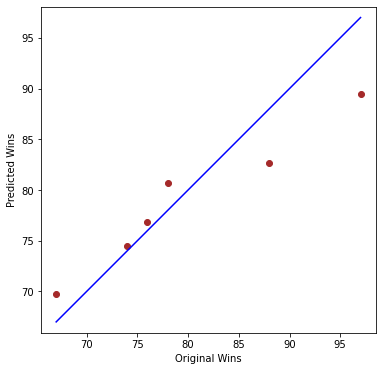

In [187]:
# Graph to show the diffrence between Predicated and Original Values

plt.figure(figsize=(6,6))
plt.scatter(a, predicted, color='brown')

p1 = max(max(predicted), max(a))
p2 = min(min(predicted), min(a))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Original Wins', fontsize=10)
plt.ylabel('Predicted Wins', fontsize=10)
plt.axis('equal')
plt.show()

In [182]:
import joblib
joblib.dump(dtr,'dtrmodel.obj')
dtrloadmodel=joblib.load('dtrmodel.obj')
dtrloadmodel.predict(xtest)

array([68., 84., 68., 93., 68., 68., 83., 68., 90.])